In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path1='IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_1/IITG_MV_Phase_I_Speaker_Recognition_Database_1.01/Office_Environment/Session1/English_Language/D01/1001_AD01OENC.wav'
audio_file_path2='IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_1/IITG_MV_Phase_I_Speaker_Recognition_Database_1.01/Office_Environment/Session1/Favorite_Language/D01/1001_AD01OKNC.wav'
librosa_audio_data1,librosa_sample_rate1=librosa.load(audio_file_path1)
librosa_audio_data2,librosa_sample_rate2=librosa.load(audio_file_path2)

Text(0.5, 1.0, 'English Language Audio')

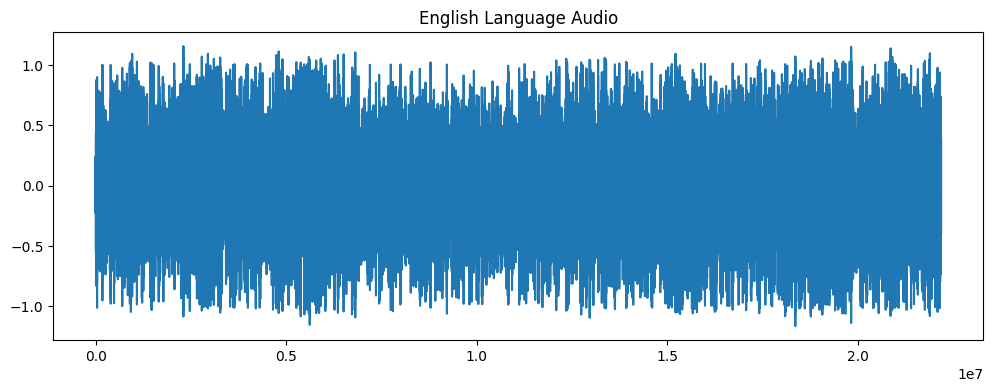

In [2]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data1)
plt.title('English Language Audio')


Text(0.5, 1.0, 'Favorite Language Audio')

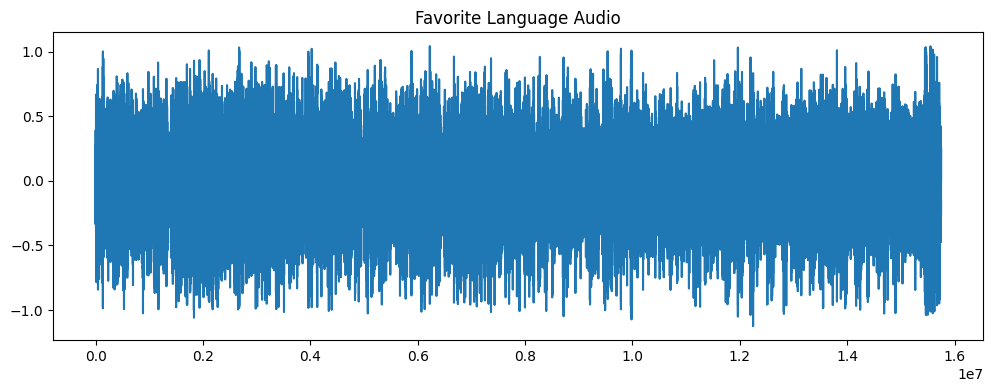

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data2)
plt.title('Favorite Language Audio')

In [4]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/'
metadata1=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_eng.csv')
metadata2=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_D01.csv')
metadata3=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_H01.csv')
metadata4=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_M01.csv')
metadata5=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_M02.csv')
metadata6=pd.read_csv('IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_T01.csv')
metadata1.head()

,disc,Address_1,Environment,Session,Language,Recording_Device,wav_files,Address_2,wav_id
0,disc_1,IITG_MV_Phase_I_Speaker_Recognition_Database_1.01,Office_Environment,Session1,English_Language,D01,1001_AD01OENC.wav,disc_1\IITG_MV_Phase_I_Speaker_Recognition_Dat...,1001
1,disc_1,IITG_MV_Phase_I_Speaker_Recognition_Database_1.01,Office_Environment,Session1,English_Language,D01,1001_AD01OENR.wav,disc_1\IITG_MV_Phase_I_Speaker_Recognition_Dat...,1001
2,disc_1,IITG_MV_Phase_I_Speaker_Recognition_Database_1.01,Office_Environment,Session1,English_Language,H01,1001_AH01OENC.wav,disc_1\IITG_MV_Phase_I_Speaker_Recognition_Dat...,1001
3,disc_1,IITG_MV_Phase_I_Speaker_Recognition_Database_1.01,Office_Environment,Session1,English_Language,H01,1001_AH01OENR.wav,disc_1\IITG_MV_Phase_I_Speaker_Recognition_Dat...,1001
4,disc_1,IITG_MV_Phase_I_Speaker_Recognition_Database_1.01,Office_Environment,Session1,English_Language,M01,1001_AM01OENC.wav,disc_1\IITG_MV_Phase_I_Speaker_Recognition_Dat...,1001


In [5]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [6]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata1.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_label1,final_class_label2])

2000it [1:21:24,  2.44s/it]


In [7]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','wav_id','wav_files'])
extracted_features_df.head()

,feature,wav_id,wav_files
0,"[-100.14327, 141.408, -90.44349, 48.122456, -2...",1001,1001_AD01OENC.wav
1,"[-93.400635, 142.4468, -93.61377, 49.428665, -...",1001,1001_AD01OENR.wav
2,"[-312.1448, 139.40472, -2.875815, 17.192211, 3...",1001,1001_AH01OENC.wav
3,"[-317.16547, 152.3441, -16.952948, 13.914769, ...",1001,1001_AH01OENR.wav
4,"[-294.5786, 137.77576, -29.958454, -15.856332,...",1001,1001_AM01OENC.wav


In [8]:
### Split the dataset into independent and dependent dataset
X_train=np.array(extracted_features_df['feature'].tolist())
y_train=np.array(extracted_features_df['wav_id'].tolist())
# z=np.array(extracted_features_df['D01'].tolist())

In [9]:
y_train.shape

(2000,)

TESTING DATASET 1


In [10]:
import numpy as np
from tqdm import tqdm
extracted_features1=[]
for index_num,row in tqdm(metadata2.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features1.append([data,final_class_label1,final_class_label2])

200it [10:50,  3.25s/it]


In [11]:
### converting extracted_features to Pandas dataframe
extracted_features1_df=pd.DataFrame(extracted_features1,columns=['feature','wav_id','wav_files'])
extracted_features1_df.head()

,feature,wav_id,wav_files
0,"[-95.667015, 138.71333, -83.94127, 41.06656, -...",1001,1001_AD01OKNC.wav
1,"[-320.93527, 118.18691, -61.014763, 32.62668, ...",1001,1001_BD01OKNC.wav
2,"[-311.03726, 127.12867, -66.55695, 37.9747, -6...",1002,1002_AD01OHNC.wav
3,"[-320.36343, 124.806946, -66.6572, 38.813297, ...",1002,1002_BD01OHNC.wav
4,"[-300.52405, 151.92856, -96.720375, 49.4383, -...",1005,1005_AD01OHNC.wav


TESTING DATASET 2


In [12]:
import numpy as np
from tqdm import tqdm
extracted_features2=[]
for index_num,row in tqdm(metadata3.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features2.append([data,final_class_label1,final_class_label2])

200it [10:50,  3.25s/it]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features2_df=pd.DataFrame(extracted_features2,columns=['feature','wav_id','wav_files'])
extracted_features2_df.head()

,feature,wav_id,wav_files
0,"[-315.32715, 151.15099, 2.5390542, 7.44357, 21...",1001,1001_AH01OKNC.wav
1,"[-321.89377, 140.80576, -4.124968, 15.065647, ...",1001,1001_BH01OKNC.wav
2,"[-191.72925, 134.90233, -23.329948, 35.794594,...",1002,1002_AH01OHNC.wav
3,"[-191.23888, 132.5427, -23.011148, 42.761574, ...",1002,1002_BH01OHNC.wav
4,"[-188.43262, 175.30916, -36.97678, 18.092287, ...",1005,1005_AH01OHNC.wav


TESTING DATASET 3


In [14]:
import numpy as np
from tqdm import tqdm
extracted_features3=[]
for index_num,row in tqdm(metadata4.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features3.append([data,final_class_label1,final_class_label2])

200it [10:32,  3.16s/it]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features3_df=pd.DataFrame(extracted_features3,columns=['feature','wav_id','wav_files'])
extracted_features3_df.head()

,feature,wav_id,wav_files
0,"[-309.34497, 149.04422, -25.404354, -25.778412...",1001,1001_AM01OKNC.wav
1,"[-308.84, 133.3753, -29.455133, -26.436453, 3....",1001,1001_BM01OKNC.wav
2,"[-269.72177, 153.61198, -36.659805, -26.767101...",1002,1002_AM01OHNC.wav
3,"[-276.39502, 162.4677, -43.75818, -28.983965, ...",1002,1002_BM01OHNC.wav
4,"[-245.24681, 162.62985, -46.36927, -12.7468195...",1005,1005_AM01OHNC.wav


TESTING DATASET 4


In [16]:
import numpy as np
from tqdm import tqdm
extracted_features4=[]
for index_num,row in tqdm(metadata5.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features4.append([data,final_class_label1,final_class_label2])

200it [10:35,  3.18s/it]


In [17]:
### converting extracted_features to Pandas dataframe
extracted_features4_df=pd.DataFrame(extracted_features4,columns=['feature','wav_id','wav_files'])
extracted_features4_df.head()

,feature,wav_id,wav_files
0,"[-313.50476, 155.73637, 11.445284, -12.976183,...",1001,1001_AM02OKNC.wav
1,"[-336.22794, 154.20287, -2.9458504, -15.447759...",1001,1001_BM02OKNC.wav
2,"[-298.75952, 158.85913, 2.250538, -15.878189, ...",1002,1002_AM02OHNC.wav
3,"[-317.9134, 164.38113, 3.7528334, -12.756791, ...",1002,1002_BM02OHNC.wav
4,"[-295.64264, 163.07422, -11.214451, -3.061794,...",1005,1005_AM02OHNC.wav


TESTING DATASET 5


In [18]:
import numpy as np
from tqdm import tqdm
extracted_features5=[]
for index_num,row in tqdm(metadata6.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["disc"]) + '/' ,str(row["Address_1"]) + '/' ,'Office_Environment/' ,str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features5.append([data,final_class_label1,final_class_label2])

200it [10:57,  3.29s/it]


In [19]:
### converting extracted_features to Pandas dataframe
extracted_features5_df=pd.DataFrame(extracted_features5,columns=['feature','wav_id','wav_files'])
extracted_features5_df.head()

,feature,wav_id,wav_files
0,"[-303.09937, 151.74403, 26.174328, 1.4325701, ...",1001,1001_AT01OKNC.wav
1,"[-294.9472, 142.26245, 26.929422, 0.5703501, -...",1001,1001_BT01OKNC.wav
2,"[-258.54407, 147.74008, 23.415836, 2.6416948, ...",1002,1002_AT01OHNC.wav
3,"[-288.19934, 159.07605, 18.713999, 4.571572, -...",1002,1002_BT01OHNC.wav
4,"[-266.62302, 165.36906, 5.0311155, 4.352781, -...",1005,1005_AT01OHNC.wav


In [20]:
### Split the dataset into independent and dependent dataset
X_test1=np.array(extracted_features1_df['feature'].tolist())
y_test1=np.array(extracted_features1_df['wav_id'].tolist())

X_test2=np.array(extracted_features2_df['feature'].tolist())
y_test2=np.array(extracted_features2_df['wav_id'].tolist())

X_test3=np.array(extracted_features3_df['feature'].tolist())
y_test3=np.array(extracted_features3_df['wav_id'].tolist())

X_test4=np.array(extracted_features4_df['feature'].tolist())
y_test4=np.array(extracted_features4_df['wav_id'].tolist())

X_test5=np.array(extracted_features5_df['feature'].tolist())
y_test5=np.array(extracted_features5_df['wav_id'].tolist())


In [21]:
y_test5.shape

(200,)

In [22]:
## Label Encoding
# y=np.array(pd.get_dummies(y))
## Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_train=to_categorical(labelencoder.fit_transform(y_train))
y_test1=to_categorical(labelencoder.fit_transform(y_test1))
y_test2=to_categorical(labelencoder.fit_transform(y_test2))
y_test3=to_categorical(labelencoder.fit_transform(y_test3))
y_test4=to_categorical(labelencoder.fit_transform(y_test4))
y_test5=to_categorical(labelencoder.fit_transform(y_test5))

MODEL CREATION

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
### No of classes
num_labels=y_train.shape[1]

CNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model1 = Sequential()

# Reshape input for 1D convolution
model1.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model1.add(Conv1D(100, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Second convolutional layer
model1.add(Conv1D(200, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Third convolutional layer
model1.add(Conv1D(100, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Flatten the output before the final layer
model1.add(Flatten())

# Final layer
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model2 = Sequential()

# Reshape input for 1D convolution
model2.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model2.add(Conv1D(100, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Second convolutional layer
model2.add(Conv1D(200, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Third convolutional layer
model2.add(Conv1D(100, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Flatten the output before the final layer
model2.add(Flatten())

# Final layer
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model3 = Sequential()

# Reshape input for 1D convolution
model3.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model3.add(Conv1D(100, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Second convolutional layer
model3.add(Conv1D(200, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Third convolutional layer
model3.add(Conv1D(100, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Flatten the output before the final layer
model3.add(Flatten())

# Final layer
model3.add(Dense(num_labels))
model3.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model4 = Sequential()

# Reshape input for 1D convolution
model4.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model4.add(Conv1D(100, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.1))

# Second convolutional layer
model4.add(Conv1D(200, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.15))

# Third convolutional layer
model4.add(Conv1D(100, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.15))

# Flatten the output before the final layer
model4.add(Flatten())

# Final layer
model4.add(Dense(num_labels))
model4.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model5 = Sequential()

# Reshape input for 1D convolution
model5.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model5.add(Conv1D(100, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Second convolutional layer
model5.add(Conv1D(200, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Third convolutional layer
model5.add(Conv1D(100, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Flatten the output before the final layer
model5.add(Flatten())

# Final layer
model5.add(Dense(num_labels))
model5.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [30]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model5.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 40, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 38, 100)           400       
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 200)           60200     
                                                                 
 conv1d_2 (Conv1D)           (None, 34, 100)           60100     
                                                                 
 flatten (Flatten)           (None, 3400)              0         
                                                                 
 dense (Dense)               (None, 100)               340100    
                                                                 
 activation (Activation)     (None, 100)               0

In [32]:
## Trianing my model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 15
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

# history1 = model1.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test1, y_test1), callbacks=[checkpointer], verbose=1)
# history2 = model2.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test2, y_test2), callbacks=[checkpointer], verbose=1)
# history3 = model3.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test3, y_test3), callbacks=[checkpointer], verbose=1)
# history4 = model4.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test4, y_test4), callbacks=[checkpointer], verbose=1)
# history5 = model5.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test5, y_test5), callbacks=[checkpointer], verbose=1)

models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]

histories = []

for model, X_test, y_test in zip(models, X_tests, y_tests):
    history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
    histories.append(history)



duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/15
61/63 [============================>.] - ETA: 0s - loss: 4.4917 - accuracy: 0.0456
Epoch 1: val_loss improved from inf to 3.57575, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 2s 17ms/step - loss: 4.4724 - accuracy: 0.0480 - val_loss: 3.5758 - val_accuracy: 0.1800
Epoch 2/15
16/63 [======>.......................] - ETA: 0s - loss: 3.3069 - accuracy: 0.2246

E:\Users\vinay\Documents\ML project 1\myenv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/63 [============================>.] - ETA: 0s - loss: 2.6857 - accuracy: 0.3256
Epoch 2: val_loss improved from 3.57575 to 1.80500, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 1s 11ms/step - loss: 2.6850 - accuracy: 0.3245 - val_loss: 1.8050 - val_accuracy: 0.4600
Epoch 3/15
60/63 [===========================>..] - ETA: 0s - loss: 1.3172 - accuracy: 0.6297
Epoch 3: val_loss improved from 1.80500 to 1.12816, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 1s 11ms/step - loss: 1.3178 - accuracy: 0.6290 - val_loss: 1.1282 - val_accuracy: 0.6900
Epoch 4/15
63/63 [==============================] - ETA: 0s - loss: 0.7069 - accuracy: 0.7955
Epoch 4: val_loss improved from 1.12816 to 0.86663, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 1s 11ms/step - loss: 0.7069 - accuracy: 0.7955 - val_loss: 0.8666 - val_accuracy: 0.7500
Epoch 5/15
61/63 [

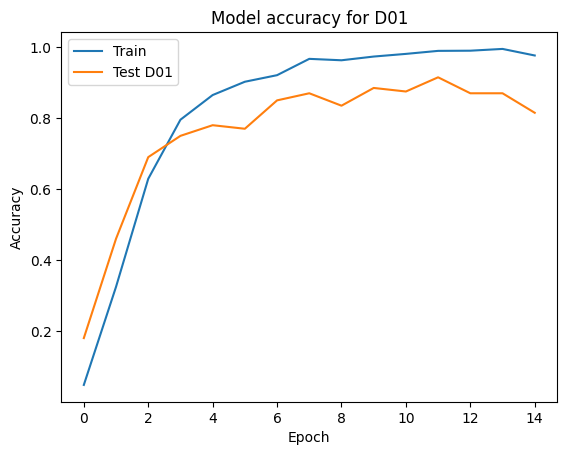

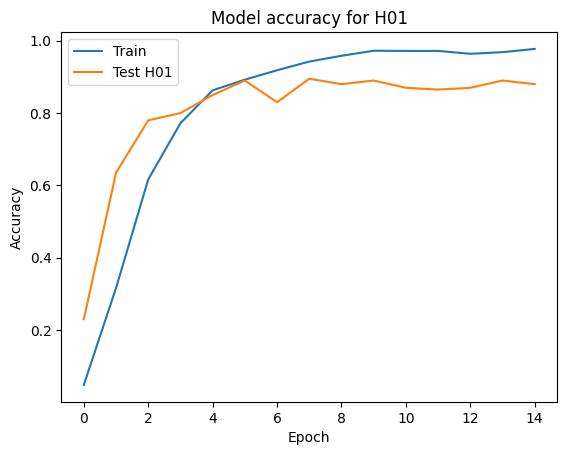

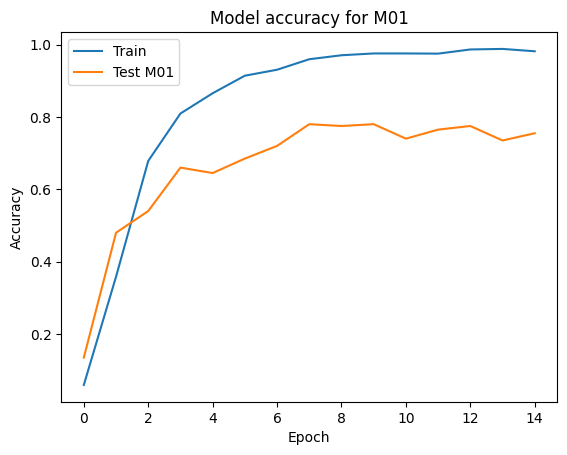

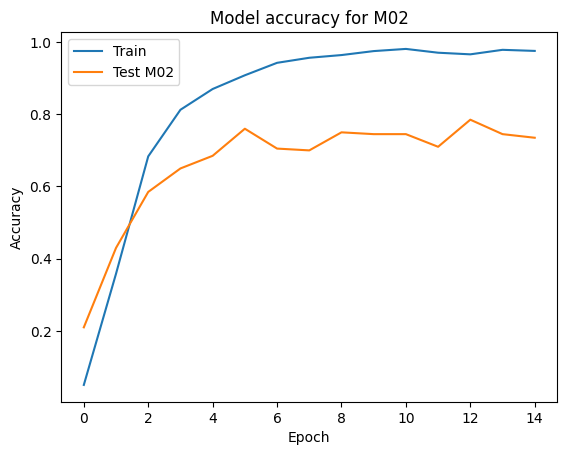

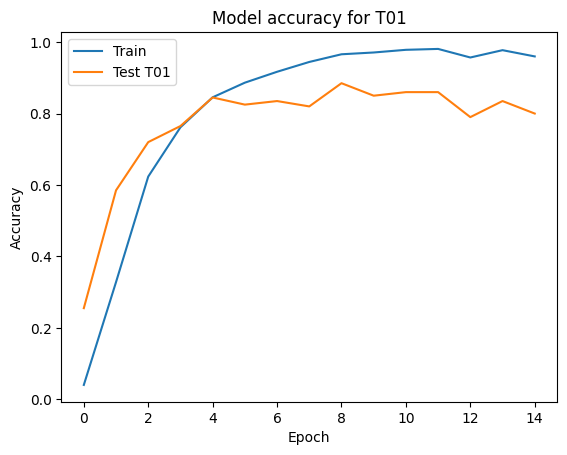

In [33]:
##ACCURACY GRAPHS
# List of history objects

model_names = ['D01', 'H01', 'M01', 'M02', 'T01']

# Plot training & validation accuracy values using a for loop
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label='Train ')
    plt.plot(history.history['val_accuracy'], label=f'Test {model_names[i]}')

    plt.title(f'Model accuracy for {model_names[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()


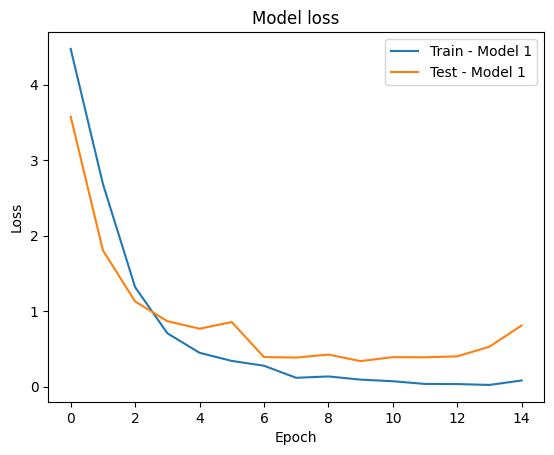

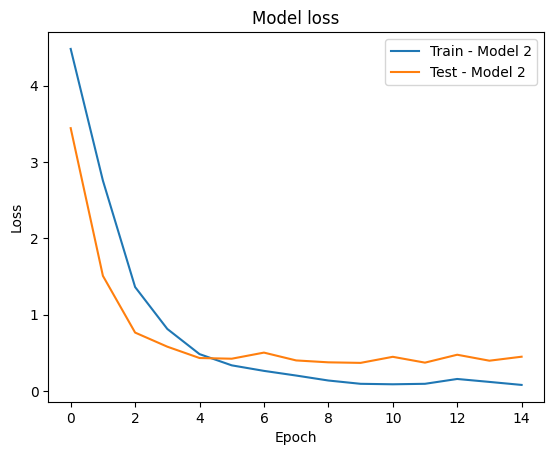

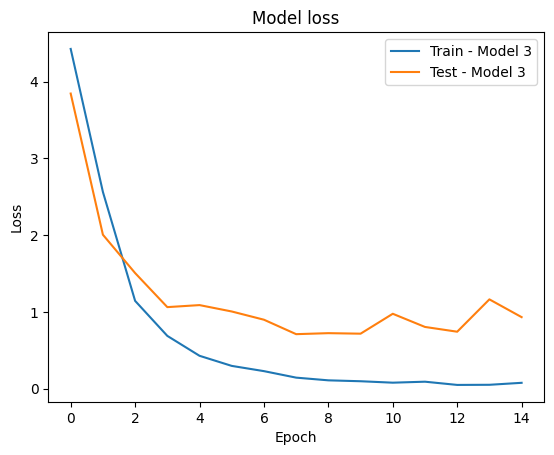

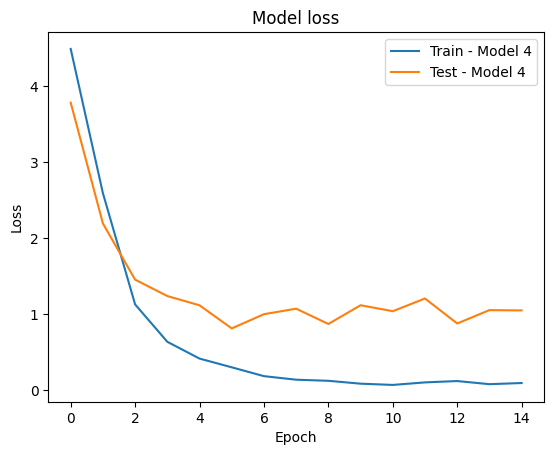

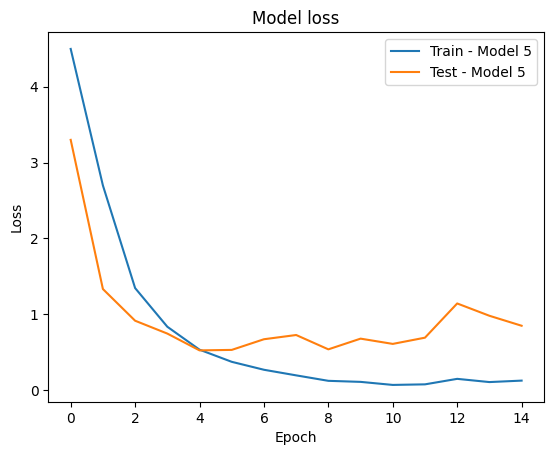

In [34]:
##LOSS GRAPHS


# Plot training & validation loss values using a for loop
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train - Model {i+1}')
    plt.plot(history.history['val_loss'], label=f'Test - Model {i+1}')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

        

In [35]:
A00 = ['D01', 'H01', 'M01', 'M02', 'T01']
models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]

for i, model in enumerate(models):
    test_accuracy = model.evaluate(X_tests[i], y_tests[i], verbose=0)
    print(A00[i],"::",test_accuracy[1] * 100,"%")


D01 :: 81.49999976158142 %
H01 :: 87.99999952316284 %
M01 :: 75.49999952316284 %
M02 :: 73.50000143051147 %
T01 :: 80.0000011920929 %


In [36]:
models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]
model_names = ['D01', 'H01', 'M01', 'M02', 'T01']

# Iterate over models, X_tests, and y_tests using a for loop
for model, X_test, y_test, model_name in zip(models, X_tests, y_tests, model_names):
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_name}:: {test_accuracy[1] * 100}%')


D01:: 81.49999976158142%
H01:: 87.99999952316284%
M01:: 75.49999952316284%
M02:: 73.50000143051147%
T01:: 80.0000011920929%


##################################################################################################

TESTTING SOME FILES

In [37]:
filename = "test_audio_file_1013.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Ensure the data type is compatible with the model
mfccs_scaled_features = mfccs_scaled_features.astype(np.float32)  # or np.float64, depending on your model

# Print information
print("MFCCs Scaled Features:", mfccs_scaled_features)
print("Shape of MFCCs Scaled Features:", mfccs_scaled_features.shape)

# Make prediction
predicted_label = model.predict(mfccs_scaled_features)

# Convert predicted label to class
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))

print("Predicted Label:", predicted_label)
print("Prediction Class:", prediction_class)


MFCCs Scaled Features: [[-2.5040028e+02  1.3209682e+02 -7.8717418e+00  2.9269650e+01
  -5.5777869e+00  3.0365632e+00 -1.0113774e+01 -8.1464243e+00
  -8.6004725e+00 -8.8366346e+00 -2.0765049e+00 -4.8153329e+00
   1.9108819e+00 -7.4406199e+00  4.7980404e+00 -1.3601016e+00
  -6.0364585e+00  1.7559185e+00 -3.0053513e+00 -3.2974792e-01
  -3.7073066e+00 -2.0227890e-01 -2.9720175e+00 -3.2463298e+00
  -1.3024983e+00 -2.1270351e+00  4.6659362e-01 -1.7546346e+00
   9.4589762e-02 -1.3951576e+00 -1.1924760e+00 -1.6818579e+00
  -2.1828158e+00 -2.1008353e+00 -2.7897167e+00 -1.3570875e+00
  -3.0272875e+00 -2.3301322e+00 -2.2447050e+00 -1.3575134e+00]]
Shape of MFCCs Scaled Features: (1, 40)
1/1 [==============================] - 0s 108ms/step
Predicted Label: [[5.79697098e-13 3.95450229e-03 1.60423183e-16 1.01418848e-07
  6.42901301e-01 1.51380360e-01 1.13022989e-17 7.98428857e-07
  3.34184842e-05 1.29601042e-13 6.23908256e-17 8.98575299e-17
  2.11420332e-13 1.17433019e-09 3.08111758e-08 1.25732346e-